In [80]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import pickle

# cofigure seaborn
sns.set(style='whitegrid', context='notebook', palette='deep')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Load data
df = pd.read_csv('../data/raw/temp_df_cleaned.csv')
df

propertyCode  propertyType        municipality          status  \
0         97942302  countryHouse  Riba-Roja de Túria            good   
1         97956954        duplex             Manises            good   
2         98200619          flat            València            good   
3         98341195        chalet             Godella            good   
4         98015046          flat            València            good   
...            ...           ...                 ...             ...   
3017      98214599          flat            València  newdevelopment   
3018      98214582          flat            València  newdevelopment   
3019      98091690          flat            València  newdevelopment   
3020      98091689          flat            València  newdevelopment   
3021      91245678        chalet               Turis            good   

      numPhotos  rooms  bathrooms  floor   size  priceByArea  ...  hasPlan  \
0            23      5          2      0  140.0          6.0  ...    False   
1            18      3          3      1  100.0          9.0  ...    False   
2            26      3          2      2  145.0          8.0  ...    False   
3            48      4          5      0  339.0          8.0  ...     True   
4            21      3          2      0  103.0         17.0  ...    False   
...         ...    ...        ...    ...    ...          ...  ...      ...   
3017         34      3          2      2  104.0         10.0  ...     True   
3018         34      3          2      1  109.0         10.0  ...     True   
3019         34      3          2     10  103.0         10.0  ...     True   
3020         34      2          2     10   83.0         13.0  ...     True   
3021         37      3          2      0  198.0          6.0  ...    False   

      has3DTour  has360  hasLift  isFinished  hasParkingSpace  \
0         False   False    False        True            False   
1         False   False     True        True             True   
2         False   False     True        True            False   
3         False   False    False        True             True   
4         False   False     True        True            False   
...         ...     ...      ...         ...              ...   
3017      False   False     True       False            False   
3018      False   False     True       False            False   
3019      False   False     True       False            False   
3020      False   False     True       False            False   
3021      False   False    False        True             True   

      isParkingSpaceIncludedInPrice   latitude  longitude   price  
0                             False  39.544071  -0.566219   850.0  
1                              True  39.499602  -0.474603   900.0  
2                             False  39.466220  -0.387735  1200.0  
3                              True  39.529005  -0.425450  2700.0  
4                             False  39.470266  -0.331696  1800.0  
...                             ...        ...        ...     ...  
3017                          False  39.441000  -0.381710   995.0  
3018                          False  39.441400  -0.385010  1085.0  
3019                          False  39.439600  -0.382210  1045.0  
3020                          False  39.437800  -0.384510  1040.0  
3021                           True  39.394838  -0.659338  1100.0  

[3022 rows x 23 columns]

In [82]:
# Data to be clustered
X = df[['propertyCode', 'latitude', 'longitude']]
X

propertyCode   latitude  longitude
0         97942302  39.544071  -0.566219
1         97956954  39.499602  -0.474603
2         98200619  39.466220  -0.387735
3         98341195  39.529005  -0.425450
4         98015046  39.470266  -0.331696
...            ...        ...        ...
3017      98214599  39.441000  -0.381710
3018      98214582  39.441400  -0.385010
3019      98091690  39.439600  -0.382210
3020      98091689  39.437800  -0.384510
3021      91245678  39.394838  -0.659338

[3022 rows x 3 columns]

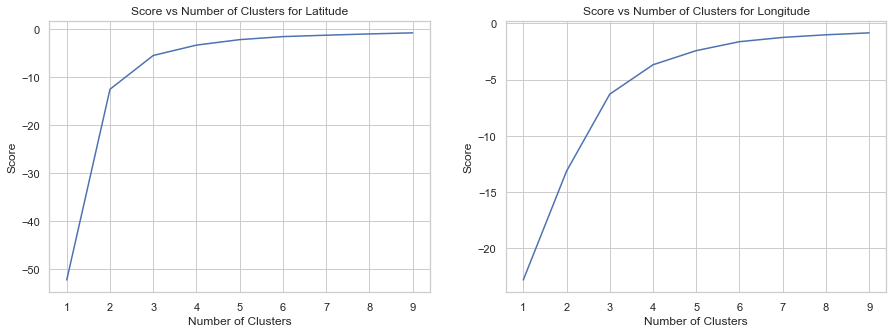

In [83]:
# Elbow method to find the optimal number of clusters
k_cluster = range(1, 10)

k_means = [KMeans(n_clusters=i) for i in k_cluster]

y_axis = df[['latitude']]
x_axis = df[['longitude']]

score_y = [k_means[i].fit(y_axis).score(y_axis) for i in range(len(k_means))]
score_x = [k_means[i].fit(x_axis).score(x_axis) for i in range(len(k_means))]

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(k_cluster, score_y)
ax[0].set_title('Score vs Number of Clusters for Latitude')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Score')

ax[1].plot(k_cluster, score_x)
ax[1].set_title('Score vs Number of Clusters for Longitude')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Score')
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X

propertyCode   latitude  longitude  cluster_label
0         97942302  39.544071  -0.566219              3
1         97956954  39.499602  -0.474603              0
2         98200619  39.466220  -0.387735              0
3         98341195  39.529005  -0.425450              0
4         98015046  39.470266  -0.331696              0
...            ...        ...        ...            ...
3017      98214599  39.441000  -0.381710              0
3018      98214582  39.441400  -0.385010              0
3019      98091690  39.439600  -0.382210              0
3020      98091689  39.437800  -0.384510              0
3021      91245678  39.394838  -0.659338              3

[3022 rows x 4 columns]

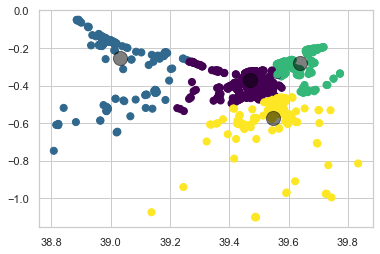

In [85]:
# Visualize the clusters
plt.scatter(X['latitude'], X['longitude'], c=X['cluster_label'], s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [86]:
# merge the dataframe with the cluster labels on propertyCode
df_clustered = pd.merge(df, X[['propertyCode', 'cluster_label']], on='propertyCode')
df_clustered

propertyCode  propertyType        municipality status  numPhotos  rooms  \
0         97942302  countryHouse  Riba-Roja de Túria   good         23      5   
1         97956954        duplex             Manises   good         18      3   
2         98200619          flat            València   good         26      3   
3         98200619          flat            València   good         26      3   
4         98200619          flat            València   good         26      3   
...            ...           ...                 ...    ...        ...    ...   
3181      98014595          flat            València   good         22      3   
3182      98263309          flat          Massanassa   good         43      3   
3183      98143828          flat            València   good         17      2   
3184      98263774          flat            València   good         13      4   
3185      91245678        chalet               Turis   good         37      3   

      bathrooms  floor   size  priceByArea  ...  has3DTour  has360  hasLift  \
0             2      0  140.0          6.0  ...      False   False    False   
1             3      1  100.0          9.0  ...      False   False     True   
2             2      2  145.0          8.0  ...      False   False     True   
3             2      2  145.0          8.0  ...      False   False     True   
4             2      2  145.0          7.0  ...      False   False     True   
...         ...    ...    ...          ...  ...        ...     ...      ...   
3181          2      1  115.0          9.0  ...      False   False     True   
3182          2      3  106.0          6.0  ...      False   False     True   
3183          1      3   74.0         11.0  ...      False   False     True   
3184          2      0  100.0         13.0  ...      False   False     True   
3185          2      0  198.0          6.0  ...      False   False    False   

      isFinished  hasParkingSpace  isParkingSpaceIncludedInPrice   latitude  \
0           True            False                          False  39.544071   
1           True             True                           True  39.499602   
2           True            False                          False  39.466220   
3           True            False                          False  39.466220   
4           True            False                          False  39.466220   
...          ...              ...                            ...        ...   
3181        True            False                          False  39.467703   
3182        True             True                           True  39.414384   
3183        True             True                           True  39.461666   
3184        True            False                          False  39.474919   
3185        True             True                           True  39.394838   

      longitude   price  cluster_label  
0     -0.566219   850.0              3  
1     -0.474603   900.0              0  
2     -0.387735  1200.0              0  
3     -0.387735  1200.0              0  
4     -0.387735  1000.0              0  
...         ...     ...            ...  
3181  -0.353992  1050.0              0  
3182  -0.398527   600.0              0  
3183  -0.344920   800.0              0  
3184  -0.354006  1300.0              0  
3185  -0.659338  1100.0              3  

[3186 rows x 24 columns]

In [94]:
# save this trained model of the clustering to use it later
pickle.dump(kmeans, open('../models/kmeans_clustering.pkl', 'wb'))

### Bonus: Visualizing the clusters on a map

In [88]:
import folium
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as colors

In [89]:
latitude =  39.4702 # Valencia's center latitude
longitude = -0.376805 # Valencia's center longitude

map_valencia = folium.Map(location=[latitude, longitude], zoom_start=9) # Create map

In [90]:
# Create a marker for each cluster
for i in range(len(centers)):
    folium.Marker(
        location=[centers[i][0], centers[i][1]],
        popup=str(i),
        icon=folium.Icon(color='red')
    ).add_to(map_valencia)

In [91]:
# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# color the map according to the clusters
clusters = folium.map.FeatureGroup()

for i in range(len(df_clustered)):
    color = rainbow[df_clustered.iloc[i]['cluster_label']]
    clusters.add_child(folium.CircleMarker(
        location=[df_clustered.iloc[i]['latitude'], df_clustered.iloc[i]['longitude']],
        radius=5,
        popup=df_clustered.iloc[i]['price'],
        color=color,
        fill=True,
        fill_opacity=0.7
    ))

map_valencia.add_child(clusters)
map_valencia

It is a great way to see how the clusters are distributed geographically, this would be a powerful tool for our analysis. 

In [92]:
# Save map (just for fun)
map_valencia.save('../../resources/doc/map_valencia.html')

In [93]:
df_clustered

propertyCode  propertyType        municipality status  numPhotos  rooms  \
0         97942302  countryHouse  Riba-Roja de Túria   good         23      5   
1         97956954        duplex             Manises   good         18      3   
2         98200619          flat            València   good         26      3   
3         98200619          flat            València   good         26      3   
4         98200619          flat            València   good         26      3   
...            ...           ...                 ...    ...        ...    ...   
3181      98014595          flat            València   good         22      3   
3182      98263309          flat          Massanassa   good         43      3   
3183      98143828          flat            València   good         17      2   
3184      98263774          flat            València   good         13      4   
3185      91245678        chalet               Turis   good         37      3   

      bathrooms  floor   size  priceByArea  ...  has3DTour  has360  hasLift  \
0             2      0  140.0          6.0  ...      False   False    False   
1             3      1  100.0          9.0  ...      False   False     True   
2             2      2  145.0          8.0  ...      False   False     True   
3             2      2  145.0          8.0  ...      False   False     True   
4             2      2  145.0          7.0  ...      False   False     True   
...         ...    ...    ...          ...  ...        ...     ...      ...   
3181          2      1  115.0          9.0  ...      False   False     True   
3182          2      3  106.0          6.0  ...      False   False     True   
3183          1      3   74.0         11.0  ...      False   False     True   
3184          2      0  100.0         13.0  ...      False   False     True   
3185          2      0  198.0          6.0  ...      False   False    False   

      isFinished  hasParkingSpace  isParkingSpaceIncludedInPrice   latitude  \
0           True            False                          False  39.544071   
1           True             True                           True  39.499602   
2           True            False                          False  39.466220   
3           True            False                          False  39.466220   
4           True            False                          False  39.466220   
...          ...              ...                            ...        ...   
3181        True            False                          False  39.467703   
3182        True             True                           True  39.414384   
3183        True             True                           True  39.461666   
3184        True            False                          False  39.474919   
3185        True             True                           True  39.394838   

      longitude   price  cluster_label  
0     -0.566219   850.0              3  
1     -0.474603   900.0              0  
2     -0.387735  1200.0              0  
3     -0.387735  1200.0              0  
4     -0.387735  1000.0              0  
...         ...     ...            ...  
3181  -0.353992  1050.0              0  
3182  -0.398527   600.0              0  
3183  -0.344920   800.0              0  
3184  -0.354006  1300.0              0  
3185  -0.659338  1100.0              3  

[3186 rows x 24 columns]